In [3]:
import pandas as pd
import lightgbm as lgb
### Load dataset
ROWS = 10 ** 8
train = pd.read_csv("/export/storage_adgandhi/PBJhours_ML/Data/Intermediate/train_test_validation/training_set.csv",nrows=ROWS)
val = pd.read_csv("/export/storage_adgandhi/PBJhours_ML/Data/Intermediate/train_test_validation/validation_set.csv",nrows=ROWS/2)
test = pd.read_csv("/export/storage_adgandhi/PBJhours_ML/Data/Intermediate/train_test_validation/testing_set.csv",nrows=ROWS/1000)
train

prov_id  employee_id  job_title  pay_type       date  hours  \
0              11      3125262          3         3  13may2017   7.04   
1              11      3680330         33         3  03mar2017   0.00   
2              11      3680330         33         3  02mar2017   0.00   
3              11      3680330         33         3  01mar2017   9.90   
4              11      3680330         33         3  28feb2017   0.00   
...           ...          ...        ...       ...        ...    ...   
99999995    10893      9432590          3         3  09dec2020   7.60   
99999996    10893      9432590          3         3  08dec2020   7.65   
99999997    10893      9432590          3         3  07dec2020   7.55   
99999998    10893      6711197          3         3  30mar2020   0.00   
99999999    10893      6711197          3         3  29mar2020   7.86   

          day_of_week  hours_l1  employees_l1  hours_l2  ...  employees_l29  \
0                   6      0.00          27.0      7.51  ...           27.0   
1                   5      0.00          13.0      9.90  ...           13.0   
2                   4      9.90          13.0      0.00  ...           13.0   
3                   3      0.00          13.0      6.90  ...           13.0   
4                   2      6.90          13.0     11.57  ...           13.0   
...               ...       ...           ...       ...  ...            ...   
99999995            3      7.65          32.0      7.55  ...           32.0   
99999996            2      7.55          32.0      0.50  ...           32.0   
99999997            1      0.50          34.0      0.50  ...           34.0   
99999998            1      7.86          27.0      7.81  ...           27.0   
99999999            0      7.81          27.0      6.55  ...           27.0   

          hours_l30  employees_l30  week_perc0  week_perc1  week_perc2  \
0              8.41           27.0        0.12        0.11        0.18   
1              6.69           13.0        0.01        0.23        0.17   
2             11.83           13.0        0.01        0.23        0.17   
3              0.00           13.0        0.01        0.23        0.17   
4              0.00           13.0        0.01        0.23        0.17   
...             ...            ...         ...         ...         ...   
99999995       7.60           32.0        0.15        0.13        0.18   
99999996       7.82           32.0        0.15        0.12        0.17   
99999997       7.87           34.0        0.15        0.12        0.17   
99999998       7.59           27.0        0.16        0.14        0.14   
99999999       7.45           27.0        0.16        0.14        0.14   

          week_perc3  week_perc4  week_perc5  week_perc6  
0               0.18        0.17        0.14        0.11  
1               0.12        0.19        0.23        0.05  
2               0.12        0.19        0.23        0.05  
3               0.12        0.19        0.23        0.05  
4               0.12        0.19        0.23        0.05  
...              ...         ...         ...         ...  
99999995        0.15        0.13        0.13        0.15  
99999996        0.15        0.12        0.12        0.15  
99999997        0.15        0.12        0.12        0.15  
99999998        0.15        0.13        0.14        0.15  
99999999        0.15        0.13        0.14        0.15  

[100000000 rows x 74 columns]

In [4]:
train.columns

Index(['prov_id', 'employee_id', 'job_title', 'pay_type', 'date', 'hours',
       'day_of_week', 'hours_l1', 'employees_l1', 'hours_l2', 'employees_l2',
       'hours_l3', 'employees_l3', 'hours_l4', 'employees_l4', 'hours_l5',
       'employees_l5', 'hours_l6', 'employees_l6', 'hours_l7', 'employees_l7',
       'hours_l8', 'employees_l8', 'hours_l9', 'employees_l9', 'hours_l10',
       'employees_l10', 'hours_l11', 'employees_l11', 'hours_l12',
       'employees_l12', 'hours_l13', 'employees_l13', 'hours_l14',
       'employees_l14', 'hours_l15', 'employees_l15', 'hours_l16',
       'employees_l16', 'hours_l17', 'employees_l17', 'hours_l18',
       'employees_l18', 'hours_l19', 'employees_l19', 'hours_l20',
       'employees_l20', 'hours_l21', 'employees_l21', 'hours_l22',
       'employees_l22', 'hours_l23', 'employees_l23', 'hours_l24',
       'employees_l24', 'hours_l25', 'employees_l25', 'hours_l26',
       'employees_l26', 'hours_l27', 'employees_l27', 'hours_l28',
       'employ

In [6]:
# %%
# ========================================
#          PREP DATAFRAMES
# ========================================

train_inputs, train_labels = train.drop(['employee_id','date','hours'], axis=1), train.filter(['hours'])
val_inputs, val_labels = val.drop(['employee_id','date','hours'], axis=1), val.filter(['hours'])
test_inputs, test_labels = test.drop(['employee_id','date','hours'], axis=1), test.filter(['hours'])

print(train_inputs)
print(train_labels)


          prov_id  job_title  pay_type  day_of_week  hours_l1  employees_l1  \
0              11          3         3            6      0.00          27.0   
1              11         33         3            5      0.00          13.0   
2              11         33         3            4      9.90          13.0   
3              11         33         3            3      0.00          13.0   
4              11         33         3            2      6.90          13.0   
...           ...        ...       ...          ...       ...           ...   
99999995    10893          3         3            3      7.65          32.0   
99999996    10893          3         3            2      7.55          32.0   
99999997    10893          3         3            1      0.50          34.0   
99999998    10893          3         3            1      7.86          27.0   
99999999    10893          3         3            0      7.81          27.0   

          hours_l2  employees_l2  hours_l3  employe

In [7]:
# %%
# ========================================
#          DATAFRAME TO LGB DS
# ========================================

cats = ['job_title', 'prov_id', 'pay_type', 'day_of_week']

train_data = lgb.Dataset(train_inputs, label=train_labels, categorical_feature=cats)
val_data = lgb.Dataset(val_inputs, label=val_labels, categorical_feature=cats)
#test_data = lgb.Dataset(test_inputs, label=test_labels, categorical_feature=cats)
print(train_data)

In [9]:
# %%
# ========================================
#            TRAIN WITH LGB
# ========================================
param = {
   'num_leaves': 150,
   'learning_rate': 0.05,
   'metric': 'mse',
   'boosting': 'gbdt',
}
evals_result = {}
bst = lgb.train(param, train_data, 300, valid_sets=[val_data], evals_result=evals_result, early_stopping_rounds=5)

/users/facsupport/asharma/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.606212 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 16888
[LightGBM] [Info] Number of data points in the train set: 100000000, number of used features: 71


/users/facsupport/asharma/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
/users/facsupport/asharma/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Info] Start training from score 4.696139
[1]	valid_0's l2: 19.3633
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l2: 18.5563
[3]	valid_0's l2: 17.8248
[4]	valid_0's l2: 17.1638
[5]	valid_0's l2: 16.5616
[6]	valid_0's l2: 16.0212
[7]	valid_0's l2: 15.5293
[8]	valid_0's l2: 15.083
[9]	valid_0's l2: 14.6776
[10]	valid_0's l2: 14.3087
[11]	valid_0's l2: 13.9744
[12]	valid_0's l2: 13.6671
[13]	valid_0's l2: 13.3816
[14]	valid_0's l2: 13.1175
[15]	valid_0's l2: 12.8837
[16]	valid_0's l2: 12.6667
[17]	valid_0's l2: 12.4737
[18]	valid_0's l2: 12.2921
[19]	valid_0's l2: 12.1271
[20]	valid_0's l2: 11.9721
[21]	valid_0's l2: 11.834
[22]	valid_0's l2: 11.7038
[23]	valid_0's l2: 11.5845
[24]	valid_0's l2: 11.4742
[25]	valid_0's l2: 11.3753
[26]	valid_0's l2: 11.2813
[27]	valid_0's l2: 11.196
[28]	valid_0's l2: 11.1173
[29]	valid_0's l2: 11.0439
[30]	valid_0's l2: 10.9744
[31]	valid_0's l2: 10.9097
[32]	valid_0's l2: 10.8438
[33]	valid_0's l2: 10.7889
[34]	val

[295]	valid_0's l2: 9.38943
[296]	valid_0's l2: 9.38837
[297]	valid_0's l2: 9.38747
[298]	valid_0's l2: 9.3866
[299]	valid_0's l2: 9.38559
[300]	valid_0's l2: 9.38503
Did not meet early stopping. Best iteration is:
[300]	valid_0's l2: 9.38503


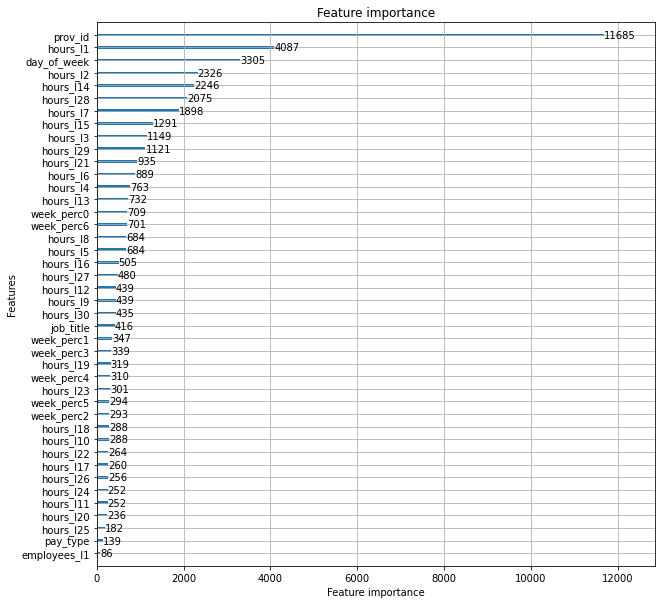

In [10]:
# %%
# =========================================
#          LGB Influence Scores
# =========================================

axes = lgb.plot_importance(bst,figsize=(10,10))

In [11]:
pd.unique(train['prov_id'])

array([   11,    26,    45, ..., 10860, 10892, 10893])

In [12]:
predictions = bst.predict(test_inputs)
MAE=0
RMSE = 0

for i in range(len(test_labels)):
    prediction = predictions[i]
    value = test_labels.iloc[i]['hours']
    print(f"Prediction: {prediction} True Value: {value}")
    MAE += abs(prediction-value)
    RMSE += (prediction-value)**2
    
print(f"Mean absolute error {MAE/len(test_labels)}")
print(f"Root mean squared error {(RMSE/len(test_labels))**0.5}")

Prediction: 0.243586464433764 True Value: 0.0
Prediction: -0.05554426323500785 True Value: 0.0
Prediction: 0.013524156323210563 True Value: 0.0
Prediction: 9.25999927753121 True Value: 10.0
Prediction: 9.824171021305917 True Value: 10.0
Prediction: 9.907295163340683 True Value: 10.0
Prediction: 9.527444657702777 True Value: 10.0
Prediction: 0.2405033882062119 True Value: 0.0
Prediction: -0.05862733946255999 True Value: 0.0
Prediction: 0.007107419065113695 True Value: 0.0
Prediction: 9.25999927753121 True Value: 10.0
Prediction: 9.824171021305917 True Value: 10.0
Prediction: 9.907295163340683 True Value: 10.0
Prediction: 9.527444657702777 True Value: 10.0
Prediction: 0.1624590658022306 True Value: 0.0
Prediction: -0.0650440767206568 True Value: 0.0
Prediction: 0.007107419065113695 True Value: 0.0
Prediction: 9.25999927753121 True Value: 10.0
Prediction: 9.824171021305917 True Value: 10.0
Prediction: 9.907295163340683 True Value: 10.0
Prediction: 9.527444657702777 True Value: 10.0
Predic

Prediction: 4.796248539515632 True Value: 0.0
Prediction: 6.9239782710771705 True Value: 7.5
Prediction: 6.694948426402912 True Value: 0.0
Prediction: 5.503802185593152 True Value: 7.449999809265137
Prediction: 6.4907211925886905 True Value: 7.480000019073486
Prediction: 2.5582588469799106 True Value: 0.0
Prediction: 1.3657931979543754 True Value: 0.0
Prediction: 6.5950501639449355 True Value: 7.5
Prediction: 6.852470909152237 True Value: 7.409999847412109
Prediction: 5.6825823809546 True Value: 9.470000267028809
Prediction: 7.045407480962725 True Value: 8.010000228881836
Prediction: 4.20566503919182 True Value: 0.0
Prediction: 7.0069312901701055 True Value: 7.199999809265137
Prediction: 6.074163598746768 True Value: 7.53000020980835
Prediction: 3.753920497104177 True Value: 0.0
Prediction: 6.320086858684251 True Value: 8.270000457763672
Prediction: 6.002594252018502 True Value: 7.409999847412109
Prediction: 6.7400076776218905 True Value: 7.489999771118164
Prediction: 7.159327655258212

Prediction: 4.69351572276281 True Value: 7.699999809265137
Prediction: 2.454056628555644 True Value: 7.710000038146973
Prediction: 5.616626089856561 True Value: 0.0
Prediction: 3.5071308497277536 True Value: 7.880000114440918
Prediction: 6.5124656528592775 True Value: 7.78000020980835
Prediction: 0.9793191685251539 True Value: 0.0
Prediction: 0.37287659581378235 True Value: 0.0
Prediction: 7.070245548018375 True Value: 7.769999980926514
Prediction: 6.994048167326964 True Value: 8.15999984741211
Prediction: 5.53724295991143 True Value: 7.980000019073486
Prediction: 3.333846164129044 True Value: 0.0
Prediction: 6.937659733992345 True Value: 7.869999885559082
Prediction: 7.605194173025406 True Value: 8.109999656677246
Prediction: 8.01140320716382 True Value: 8.09000015258789
Prediction: 7.160653455816865 True Value: 8.0
Prediction: 3.4863673841796854 True Value: 7.449999809265137
Prediction: 2.881695449569142 True Value: 8.180000305175781
Prediction: 5.755622942940236 True Value: 7.940000

Prediction: 5.517277671163622 True Value: 7.71999979019165
Prediction: 3.5305144568351494 True Value: 0.0
Prediction: 0.6369460036493745 True Value: 0.0
Prediction: 0.9856320808393092 True Value: 0.0
Prediction: 1.6404477922614293 True Value: 0.0
Prediction: 6.068062288194 True Value: 11.97999954223633
Prediction: 6.831465575604482 True Value: 2.569999933242798
Prediction: 6.05198887062196 True Value: 7.420000076293945
Prediction: 5.419897827728107 True Value: 0.0
Prediction: 1.1593078817781142 True Value: 0.0
Prediction: 5.6464829904251355 True Value: 7.75
Prediction: 4.354590123197442 True Value: 0.0
Prediction: 6.303891654351425 True Value: 7.460000038146973
Prediction: 2.63240221285057 True Value: 7.309999942779541
Prediction: 5.604699972426693 True Value: 7.360000133514404
Prediction: 2.2714027345634578 True Value: 7.199999809265137
Prediction: 0.695709906362787 True Value: 0.0
Prediction: 1.2807965061214097 True Value: 0.0
Prediction: 2.0109226157541293 True Value: 7.469999790191

Prediction: 0.06508277274872601 True Value: 0.0
Prediction: 1.3858863210633936 True Value: 0.0
Prediction: 7.006167867168232 True Value: 7.480000019073486
Prediction: -0.2611564342588018 True Value: 0.0
Prediction: 6.9904052270280586 True Value: 8.010000228881836
Prediction: -0.05124493502539118 True Value: 0.0
Prediction: 0.2443692915620827 True Value: 0.0
Prediction: -0.0021203921499816122 True Value: 0.0
Prediction: 3.408518634013915 True Value: 0.0
Prediction: 6.404444073874142 True Value: 7.96999979019165
Prediction: -0.2654366422257621 True Value: 0.0
Prediction: 6.311541911047131 True Value: 8.029999732971191
Prediction: 0.6192966591328096 True Value: 0.0
Prediction: 0.269224982621293 True Value: 0.0
Prediction: -0.0028122655084906276 True Value: 0.0
Prediction: 0.2637310332627569 True Value: 0.0
Prediction: 7.020934281352775 True Value: 8.039999961853027
Prediction: -0.2985748427552733 True Value: 0.0
Prediction: 7.699016948536797 True Value: 8.569999694824219
Prediction: 6.545

Prediction: 9.263665884158995 True Value: 10.0
Prediction: 9.820420504434942 True Value: 10.0
Prediction: 9.907410577005592 True Value: 10.0
Prediction: 9.482179384031904 True Value: 10.0
Prediction: 0.1102948334307687 True Value: 0.0
Prediction: -0.19400070969027206 True Value: 0.0
Prediction: 0.37653711461752976 True Value: 0.0
Prediction: 9.263665884158995 True Value: 10.0
Prediction: 9.820420504434942 True Value: 10.0
Prediction: 9.907410577005592 True Value: 10.0
Prediction: 9.482179384031904 True Value: 10.0
Prediction: 0.1102948334307687 True Value: 0.0
Prediction: -0.19400070969027206 True Value: 0.0
Prediction: 0.37653711461752976 True Value: 0.0
Prediction: 9.263665884158995 True Value: 10.0
Prediction: 9.820420504434942 True Value: 10.0
Prediction: 9.907410577005592 True Value: 10.0
Prediction: 9.482179384031904 True Value: 10.0
Prediction: 0.1102948334307687 True Value: 0.0
Prediction: -0.19400070969027206 True Value: 0.0
Prediction: 0.37653711461752976 True Value: 0.0
Pred

Prediction: 7.3208957637538035 True Value: 8.529999732971191
Prediction: -0.10592918606132559 True Value: 0.0
Prediction: 0.23612516966686264 True Value: 0.0
Prediction: -0.02492542494781315 True Value: 0.0
Prediction: 0.2550679748580268 True Value: 0.0
Prediction: 7.441199575272762 True Value: 8.210000038146973
Prediction: -0.3959451996099859 True Value: 0.0
Prediction: 7.877277662289888 True Value: 8.050000190734863
Prediction: -0.1714359224910161 True Value: 0.0
Prediction: 0.23398638602926158 True Value: 0.0
Prediction: -0.0303036222465387 True Value: 0.0
Prediction: 0.244387653061623 True Value: 0.0
Prediction: 7.342970853565211 True Value: 8.069999694824219
Prediction: -0.4280231512735216 True Value: 0.0
Prediction: 7.875262512572938 True Value: 7.96999979019165
Prediction: -0.34379114659012117 True Value: 0.0
Prediction: 0.22540411059776116 True Value: 0.0
Prediction: -0.03440143128614986 True Value: 0.0
Prediction: 0.22812580683233008 True Value: 0.0
Prediction: 7.3238056381386

Prediction: 6.43318493187614 True Value: 7.619999885559082
Prediction: 3.1082603783089358 True Value: 4.659999847412109
Prediction: 2.697328004404358 True Value: 0.0
Prediction: 0.2870974795245081 True Value: 0.0
Prediction: 2.7836345338972612 True Value: 0.0
Prediction: 2.52227085067998 True Value: 0.5199999809265137
Prediction: 6.65622746439229 True Value: 3.0
Prediction: 6.036095995228359 True Value: 7.710000038146973
Prediction: 3.3571688120322745 True Value: 4.599999904632568
Prediction: 4.868156535833543 True Value: 3.0
Prediction: 10.286963624343626 True Value: 7.630000114440918
Prediction: 5.352021965628057 True Value: 4.650000095367432
Prediction: 4.787351797318326 True Value: 3.0
Prediction: 5.891398939310876 True Value: 7.699999809265137
Prediction: 6.903321341883448 True Value: 7.610000133514404
Prediction: 7.002426347279341 True Value: 7.670000076293945
Prediction: 1.3482371948831997 True Value: 4.820000171661377
Prediction: 0.20905071910975315 True Value: 0.0
Prediction: 

Prediction: 0.3357285469727095 True Value: 0.0
Prediction: 0.5286984978187786 True Value: 0.0
Prediction: 6.013485266447228 True Value: 7.539999961853027
Prediction: 6.810309019060492 True Value: 7.28000020980835
Prediction: 6.760805798450588 True Value: 7.599999904632568
Prediction: 5.966975495490291 True Value: 7.409999847412109
Prediction: 2.12745633607589 True Value: 0.0
Prediction: 6.630971506226027 True Value: 7.53000020980835
Prediction: 6.875401677119532 True Value: 7.400000095367432
Prediction: 3.384865985266922 True Value: 0.0
Prediction: 6.576496225786483 True Value: 8.649999618530273
Prediction: 3.094726104812511 True Value: 7.400000095367432
Prediction: 5.834436791010269 True Value: 0.0
Prediction: 6.015113147654394 True Value: 0.0
Prediction: 0.3035832102356219 True Value: 0.0
Prediction: 1.3470695645845916 True Value: 0.0
Prediction: 6.2677473807023585 True Value: 8.5
Prediction: 6.643736720806756 True Value: 7.320000171661377
Prediction: 6.429861562109899 True Value: 7.

Prediction: 8.539871565612358 True Value: 6.349999904632568
Prediction: 5.221665067882708 True Value: 8.300000190734863
Prediction: 2.620485128148433 True Value: 0.0
Prediction: 0.8212906252603157 True Value: 0.0
Prediction: 2.5412801224838613 True Value: 0.0
Prediction: 10.782730129175391 True Value: 12.17000007629395
Prediction: 12.515835611838783 True Value: 14.92000007629395
Prediction: 4.456260095173455 True Value: 0.0
Prediction: 1.6405949011802317 True Value: 6.429999828338623
Prediction: 1.5970866773922099 True Value: 0.0
Prediction: 1.5445007047908779 True Value: 0.0
Prediction: 3.443168566008578 True Value: 7.099999904632568
Prediction: 1.186234136726768 True Value: 7.71999979019165
Prediction: 3.989360374143307 True Value: 0.0
Prediction: 7.156376019287479 True Value: 0.0
Prediction: 3.576099059758871 True Value: 7.570000171661377
Prediction: 1.6701325526529316 True Value: 6.789999961853027
Prediction: 1.2447221860505109 True Value: 0.0
Prediction: 1.141035643129659 True Val

Prediction: 7.107404238944159 True Value: 8.050000190734863
Prediction: 0.2871228354823283 True Value: 0.0
Prediction: 0.056170269388813365 True Value: 0.0
Prediction: 7.4323226563829 True Value: 7.829999923706055
Prediction: 7.517445833148284 True Value: 7.869999885559082
Prediction: 7.487894047738229 True Value: 8.0
Prediction: 7.614500625387231 True Value: 8.920000076293945
Prediction: 0.4171112138784311 True Value: 0.0
Prediction: 8.060369844245354 True Value: 7.900000095367432
Prediction: 7.889728763969744 True Value: 7.78000020980835
Prediction: 0.30236226125903676 True Value: 0.0
Prediction: 7.676962957936971 True Value: 0.0
Prediction: 5.659024443777512 True Value: 7.869999885559082
Prediction: 7.754840686712274 True Value: 0.0
Prediction: 5.531967555000497 True Value: 7.900000095367432
Prediction: 0.787670463837003 True Value: 0.0
Prediction: 0.1527330033282704 True Value: 0.0
Prediction: 7.068444213293164 True Value: 7.980000019073486
Prediction: 7.498128650564605 True Value:

Prediction: 5.763125810697383 True Value: 8.270000457763672
Prediction: 8.118233190887226 True Value: 7.940000057220459
Prediction: 7.496491981456021 True Value: 9.5
Prediction: 1.4766796114987766 True Value: 0.0
Prediction: 10.260321461372278 True Value: 11.60999965667725
Prediction: 11.191788307229512 True Value: 0.0
Prediction: 5.222064721069526 True Value: 0.0
Prediction: 2.218629871571563 True Value: 10.26000022888184
Prediction: 7.0204847264992924 True Value: 7.849999904632568
Prediction: 6.640633265131918 True Value: 12.6899995803833
Prediction: 7.415523737025953 True Value: 8.449999809265137
Prediction: 3.086804593212545 True Value: 0.0
Prediction: 2.1967488870741705 True Value: 0.0
Prediction: 7.303085393991662 True Value: 9.68000030517578
Prediction: 9.093110972141805 True Value: 10.89999961853027
Prediction: 8.823748144868647 True Value: 7.949999809265137
Prediction: 7.914414880974903 True Value: 8.300000190734863
Prediction: 0.9056193944576784 True Value: 0.0
Prediction: 9.

Prediction: 2.2619456348135785 True Value: 7.199999809265137
Prediction: 0.4403752468398205 True Value: 0.0
Prediction: 7.512694963705258 True Value: 11.55000019073486
Prediction: 9.731677146440823 True Value: 11.39999961853027
Prediction: 4.770673532431237 True Value: 0.0
Prediction: 5.983790937320133 True Value: 11.69999980926514
Prediction: 7.0240572454070165 True Value: 7.21999979019165
Prediction: 6.375201059935169 True Value: 7.320000171661377
Prediction: 8.612901214465024 True Value: 9.789999961853027
Prediction: 0.49644126100313585 True Value: 0.0
Prediction: 0.20294343560312783 True Value: 0.0
Prediction: 7.192884027237672 True Value: 7.400000095367432
Prediction: 8.053394203938234 True Value: 7.449999809265137
Prediction: 7.45318044111362 True Value: 8.369999885559082
Prediction: 6.1301422674152155 True Value: 7.320000171661377
Prediction: 0.4814168465647007 True Value: 1.220000028610229
Prediction: 9.329190633937811 True Value: 11.46000003814697
Prediction: 10.14587605458099

Prediction: 2.9380963381572025 True Value: 7.579999923706055
Prediction: 4.127949236719514 True Value: 7.449999809265137
Prediction: 5.434144962049337 True Value: 7.389999866485596
Prediction: 0.48717248247499195 True Value: 0.0
Prediction: 0.2599045480441963 True Value: 0.0
Prediction: 7.270537010192005 True Value: 7.449999809265137
Prediction: 7.911910095939757 True Value: 7.949999809265137
Prediction: 7.0174412304951055 True Value: 7.829999923706055
Prediction: 5.373820464097189 True Value: 7.269999980926514
Prediction: 0.9171593012335996 True Value: 0.0
Prediction: 9.377764897094224 True Value: 11.56999969482422
Prediction: 11.099922944142508 True Value: 12.15999984741211
Prediction: 1.2811227622993402 True Value: 0.0
Prediction: 6.817171001931044 True Value: 7.769999980926514
Prediction: 6.177356349202965 True Value: 7.619999885559082
Prediction: 6.533350578183161 True Value: 7.420000076293945
Prediction: 6.199625745561816 True Value: 0.0
Prediction: 0.9289268921812288 True Value:

Prediction: 7.51510179107546 True Value: 7.400000095367432
Prediction: 4.878786486034151 True Value: 8.65999984741211
Prediction: 2.757375967446554 True Value: 0.0
Prediction: 7.0510137861001665 True Value: 6.889999866485596
Prediction: 6.565624840959014 True Value: 7.550000190734863
Prediction: 6.0282074539127235 True Value: 7.690000057220459
Prediction: 6.2577330605010495 True Value: 7.360000133514404
Prediction: 5.124496225019372 True Value: 1.350000023841858
Prediction: 7.488593511715719 True Value: 7.28000020980835
Prediction: 6.813431553868237 True Value: 8.6899995803833
Prediction: 0.6174015775430339 True Value: 0.0
Prediction: 1.120531821384761 True Value: 0.0
Prediction: 5.9307489440764005 True Value: 7.75
Prediction: 5.282165034604924 True Value: 7.699999809265137
Prediction: 5.995852052620375 True Value: 6.699999809265137
Prediction: 2.5634081825512096 True Value: 6.670000076293945
Prediction: 5.859571214316781 True Value: 0.0
Prediction: 6.888337316279223 True Value: 6.0900

Prediction: 6.517034847753027 True Value: 8.430000305175781
Prediction: 6.184190020779258 True Value: 7.699999809265137
Prediction: 2.837121658816535 True Value: 7.739999771118164
Prediction: 3.2741891483410477 True Value: 0.0
Prediction: 1.0550665485801873 True Value: 0.0
Prediction: 3.6206794974106726 True Value: 0.0
Prediction: 3.9979181976988754 True Value: 7.650000095367432
Prediction: 4.250660311588204 True Value: 7.829999923706055
Prediction: 5.8277230560852695 True Value: 0.0
Prediction: 6.0897718803557135 True Value: 0.0
Prediction: 1.6145259543822212 True Value: 0.0
Prediction: 7.393761311837418 True Value: 7.639999866485596
Prediction: 1.4174892091971618 True Value: 12.27000045776367
Prediction: 6.88381652126977 True Value: 0.0
Prediction: 6.5086983131863105 True Value: 13.26000022888184
Prediction: 7.292886071563258 True Value: 7.690000057220459
Prediction: 4.009439978408213 True Value: 9.020000457763672
Prediction: 4.368913231412171 True Value: 7.71999979019165
Prediction:

Prediction: 9.707117425244393 True Value: 8.920000076293945
Prediction: 10.198374169306055 True Value: 13.10000038146973
Prediction: 0.6613900616942975 True Value: 0.0
Prediction: 7.815680252804644 True Value: 8.380000114440918
Prediction: 8.621192952975306 True Value: 8.369999885559082
Prediction: 8.381609610326743 True Value: 8.319999694824219
Prediction: 8.101871410509625 True Value: 0.0
Prediction: 0.6093322378525546 True Value: 0.0
Prediction: 0.09780173513702382 True Value: 0.0
Prediction: 6.28836332982332 True Value: 0.0
Prediction: 6.867756092995735 True Value: 10.61999988555908
Prediction: 8.919121466689505 True Value: 8.100000381469727
Prediction: 7.888547863567487 True Value: 8.930000305175781
Prediction: 0.7238954333374992 True Value: 0.0
Prediction: 9.588965267425012 True Value: 8.899999618530273
Prediction: 11.394879733443238 True Value: 13.02000045776367
Prediction: 0.7306263012661116 True Value: 0.0
Prediction: 7.845092822971816 True Value: 8.0
Prediction: 7.81136866607

Prediction: 3.9778652246753143 True Value: 0.0
Prediction: 3.6344300319775877 True Value: 7.119999885559082
Prediction: 1.045780883084624 True Value: 0.0
Prediction: 1.1074422266806632 True Value: 0.0
Prediction: 3.797797759586149 True Value: 6.199999809265137
Prediction: 6.4761658553497865 True Value: 6.659999847412109
Prediction: 4.394436306035401 True Value: 6.050000190734863
Prediction: 0.836643187067358 True Value: 0.0
Prediction: 0.9389365297605211 True Value: 6.78000020980835
Prediction: 1.7944368234800874 True Value: 6.650000095367432
Prediction: 5.015363011284256 True Value: 0.0
Prediction: 2.7805018702485795 True Value: 0.0
Prediction: 0.3934725513259097 True Value: 10.32999992370605
Prediction: 6.797899285397164 True Value: 6.75
Prediction: 4.063598222014175 True Value: 0.0
Prediction: 4.293458912397102 True Value: 0.0
Prediction: 1.5713343425841504 True Value: 6.730000019073486
Prediction: 3.793814973579287 True Value: 6.75
Prediction: 4.151619590670639 True Value: 0.0
Pred

Prediction: 3.7476866864280525 True Value: 7.71999979019165
Prediction: 7.1289730863382506 True Value: 7.809999942779541
Prediction: 9.341611296039117 True Value: 7.840000152587891
Prediction: 7.04801329718729 True Value: 7.840000152587891
Prediction: 2.7794335964744055 True Value: 0.0
Prediction: 7.433707647652825 True Value: 10.10000038146973
Prediction: 8.367098291962037 True Value: 7.829999923706055
Prediction: 7.16135623543382 True Value: 15.02999973297119
Prediction: 2.360496448710226 True Value: 7.96999979019165
Prediction: 4.144112907850875 True Value: 0.0
Prediction: 7.837399712179225 True Value: 14.31999969482422
Prediction: 9.133711013555331 True Value: 7.840000152587891
Prediction: 8.608206235375048 True Value: 7.820000171661377
Prediction: 6.325923321235651 True Value: 8.130000114440918
Prediction: 7.369354979923616 True Value: 7.820000171661377
Prediction: 7.596412991525376 True Value: 7.829999923706055
Prediction: 8.108860348848514 True Value: 8.0600004196167
Prediction:

Prediction: 5.748222686558299 True Value: 0.0
Prediction: 6.99402464110707 True Value: 7.25
Prediction: 5.231835241780371 True Value: 7.0
Prediction: 2.9996458230880947 True Value: 0.0
Prediction: 5.478943253630665 True Value: 0.0
Prediction: 7.755143480764913 True Value: 7.21999979019165
Prediction: 6.653323317729319 True Value: 12.69999980926514
Prediction: 2.9608535288897984 True Value: 0.8199999928474426
Prediction: 2.37587237755743 True Value: 0.0
Prediction: 4.346428015509944 True Value: 0.0
Prediction: 1.812555721107796 True Value: 7.179999828338623
Prediction: 4.287677010882192 True Value: 7.130000114440918
Prediction: 3.4353915952070095 True Value: 7.369999885559082
Prediction: 5.715773141993906 True Value: 7.360000133514404
Prediction: 4.035014477775055 True Value: 10.38000011444092
Prediction: 5.704339058995776 True Value: 11.5600004196167
Prediction: 2.9073462092764384 True Value: 7.5
Prediction: 1.5502973077129363 True Value: 0.0
Prediction: 2.389922463919478 True Value: 0

Prediction: 6.3926152339440545 True Value: 7.420000076293945
Prediction: 3.013758650773133 True Value: 0.0
Prediction: 2.768702822412302 True Value: 7.0
Prediction: 6.313926420517727 True Value: 11.02000045776367
Prediction: 6.686042664204981 True Value: 7.320000171661377
Prediction: 5.184006935187129 True Value: 6.980000019073486
Prediction: 1.2377779353534877 True Value: 7.670000076293945
Prediction: 2.9071317371674352 True Value: 0.0
Prediction: 4.786201064329841 True Value: 7.199999809265137
Prediction: 6.378878280589387 True Value: 0.0
Prediction: 0.6053950797737604 True Value: 0.0
Prediction: 0.3103205072696083 True Value: 0.0
Prediction: 6.168413184326627 True Value: 7.300000190734863
Prediction: 6.890190112979988 True Value: 7.309999942779541
Prediction: 6.545220035185612 True Value: 7.619999885559082
Prediction: 1.0570239384871458 True Value: 7.059999942779541
Prediction: 1.7048668203087771 True Value: 0.0
Prediction: 6.900726673699368 True Value: 7.190000057220459
Prediction:

Prediction: 5.056336332591761 True Value: 7.920000076293945
Prediction: 4.816664000953996 True Value: 0.0
Prediction: 6.005711403988188 True Value: 1.080000042915344
Prediction: 8.037374823077462 True Value: 0.0
Prediction: 7.734153532189391 True Value: 8.130000114440918
Prediction: 1.729734824014149 True Value: 0.0
Prediction: 0.819983351110891 True Value: 0.0
Prediction: 1.4058088357131218 True Value: 0.0
Prediction: 4.11030059401051 True Value: 7.519999980926514
Prediction: 7.533433946298262 True Value: 8.170000076293945
Prediction: 7.567347507853694 True Value: 7.730000019073486
Prediction: 7.4425342381242405 True Value: 8.079999923706055
Prediction: 1.1377110258503398 True Value: 0.0
Prediction: 3.560647151861915 True Value: 0.0
Prediction: 7.711054443334182 True Value: 0.0
Prediction: 0.9048754111771188 True Value: 0.0
Prediction: 7.2872263976675855 True Value: 8.800000190734863
Prediction: 7.9443345974906245 True Value: 14.47000026702881
Prediction: 6.085028085596392 True Value:

Prediction: 7.495596352294344 True Value: 7.179999828338623
Prediction: 7.4264608305934185 True Value: 7.849999904632568
Prediction: 0.6376426780545623 True Value: 0.0
Prediction: 5.563756458803592 True Value: 8.949999809265137
Prediction: 6.787190216523942 True Value: 8.130000114440918
Prediction: 7.478848742605378 True Value: 7.78000020980835
Prediction: 6.274477884552148 True Value: 8.079999923706055
Prediction: 0.11744444751159785 True Value: 0.0
Prediction: 0.17022010495455311 True Value: 0.0
Prediction: 6.2138796647504435 True Value: 7.699999809265137
Prediction: 7.234074951126176 True Value: 7.929999828338623
Prediction: 4.271117341910907 True Value: 7.75
Prediction: 6.078330719810078 True Value: 0.0
Prediction: 1.0623222971199016 True Value: 0.0
Prediction: 6.8469867359610905 True Value: 7.090000152587891
Prediction: 6.96956002777908 True Value: 7.320000171661377
Prediction: 1.5269466132193712 True Value: 0.0
Prediction: 7.595889954993615 True Value: 0.0
Prediction: 5.497478316

Prediction: 5.677646974052985 True Value: 7.449999809265137
Prediction: 0.6020647202677347 True Value: 0.0
Prediction: 0.5685075665570316 True Value: 0.0
Prediction: 1.0653069519088942 True Value: 0.0
Prediction: 1.932859463930316 True Value: 0.0
Prediction: 6.616135859897702 True Value: 0.0
Prediction: 6.796184305277529 True Value: 7.400000095367432
Prediction: 5.218681521958758 True Value: 7.489999771118164
Prediction: 0.565784690015545 True Value: 0.0
Prediction: 0.7045281905845553 True Value: 0.0
Prediction: 0.9298398064015851 True Value: 0.0
Prediction: 1.2681350862979017 True Value: 0.0
Prediction: 6.73737968881065 True Value: 7.429999828338623
Prediction: 6.728202162527212 True Value: 7.480000019073486
Prediction: 5.739813604904668 True Value: 7.460000038146973
Prediction: 0.5576669821160923 True Value: 0.0
Prediction: 0.6200430387046761 True Value: 0.0
Prediction: 1.5197470603833652 True Value: 0.0
Prediction: 3.982922110526297 True Value: 0.0
Prediction: 5.2350989931835805 Tru

Prediction: 7.447062944487164 True Value: 8.0
Prediction: 7.51578970855549 True Value: 8.0
Prediction: 7.578067184991572 True Value: 8.0
Prediction: 7.2113699154562 True Value: 8.0
Prediction: -0.2626579017069333 True Value: 0.0
Prediction: -0.061341139131171854 True Value: 0.0
Prediction: 7.492976068150345 True Value: 8.0
Prediction: 7.861487860103996 True Value: 8.0
Prediction: 7.847027164539751 True Value: 8.0
Prediction: 7.754102054693754 True Value: 8.0
Prediction: 7.2113699154562 True Value: 8.0
Prediction: -0.2626579017069333 True Value: 0.0
Prediction: -0.061341139131171854 True Value: 0.0
Prediction: 7.492976068150345 True Value: 0.0
Prediction: 5.801071618319237 True Value: 8.0
Prediction: 7.844241821513994 True Value: 0.0
Prediction: 6.087503610324369 True Value: 8.0
Prediction: 7.20281260584653 True Value: 8.0
Prediction: 0.16358662753861675 True Value: 0.0
Prediction: 0.017716982346041785 True Value: 0.0
Prediction: 7.139853726053385 True Value: 8.0
Prediction: 7.725265256

Prediction: 1.3006008692127033 True Value: 0.0
Prediction: 0.09445760540144514 True Value: 0.0
Prediction: 6.962075618994247 True Value: 7.210000038146973
Prediction: 7.316937357893995 True Value: 0.0
Prediction: 2.108031458355071 True Value: 9.699999809265137
Prediction: 5.728528746470634 True Value: 6.150000095367432
Prediction: 6.468881017321391 True Value: 3.5
Prediction: 0.022608301065279317 True Value: 0.0
Prediction: 0.5493944644036972 True Value: 0.0
Prediction: 5.614298964516625 True Value: 7.96999979019165
Prediction: 7.528844009006996 True Value: 6.179999828338623
Prediction: 5.4296473980729 True Value: 8.470000267028809
Prediction: 7.216639025314545 True Value: 0.0
Prediction: 4.29827437750034 True Value: 7.760000228881836
Prediction: -0.042601647135501755 True Value: 0.0
Prediction: 0.16608427713792237 True Value: 0.0
Prediction: 3.3595041119040343 True Value: 0.0
Prediction: 5.702474147898415 True Value: 0.0
Prediction: 7.783510452293372 True Value: 0.0
Prediction: 7.6037

Prediction: 8.165548959429065 True Value: 11.32999992370605
Prediction: 5.233620553301421 True Value: 7.96999979019165
Prediction: 1.635004948429151 True Value: 3.0
Prediction: 3.1136399176291287 True Value: 4.5
Prediction: 1.6241476161368626 True Value: 7.829999923706055
Prediction: 5.39175167011968 True Value: 7.789999961853027
Prediction: 4.249604705800997 True Value: 0.0
Prediction: 1.0009918187375577 True Value: 0.0
Prediction: 1.7392404470707283 True Value: 0.0
Prediction: 1.0814922593282357 True Value: 0.0
Prediction: 2.09566137485488 True Value: 0.0
Prediction: 3.294446457615252 True Value: 0.0
Prediction: 1.506742508758911 True Value: 0.0
Prediction: 1.69419587477296 True Value: 0.0
Prediction: 4.2359744425634425 True Value: 0.0
Prediction: 5.843875540630435 True Value: 0.0
Prediction: 3.4388024023592854 True Value: 0.0
Prediction: 3.1675840397476684 True Value: 0.0
Prediction: 2.5779571635308893 True Value: 0.0
Prediction: 5.607146795634493 True Value: 8.5
Prediction: 2.02220

Prediction: 0.23366337558929906 True Value: 0.0
Prediction: 4.473605491111119 True Value: 0.0
Prediction: 4.707953225935844 True Value: 0.0
Prediction: 1.6550168647004055 True Value: 0.0
Prediction: 4.482084203831075 True Value: 0.0
Prediction: 3.07139897353045 True Value: 0.0
Prediction: 2.9639418386715417 True Value: 0.0
Prediction: 1.893711668617957 True Value: 0.0
Prediction: 1.8561305455571921 True Value: 0.0
Prediction: 4.6716558458838415 True Value: 7.900000095367432
Prediction: 5.5086657219512105 True Value: 0.0
Prediction: 4.520320334049436 True Value: 7.800000190734863
Prediction: 5.718960975708993 True Value: 7.619999885559082
Prediction: 1.769506492918329 True Value: 0.0
Prediction: 1.0815588804489702 True Value: 0.0
Prediction: 5.636917381237667 True Value: 8.270000457763672
Prediction: 6.981954883968666 True Value: 7.710000038146973
Prediction: 1.967418044731685 True Value: 0.0
Prediction: 5.871282966826478 True Value: 0.0
Prediction: 3.883422682099076 True Value: 7.03000

Prediction: 3.9503999990053886 True Value: 0.0
Prediction: 2.113687573855837 True Value: 0.0
Prediction: 4.138858715902187 True Value: 7.300000190734863
Prediction: 2.8271873581925404 True Value: 0.0
Prediction: 1.4438908126789944 True Value: 0.0
Prediction: 5.882722195496964 True Value: 7.389999866485596
Prediction: 6.929416777914528 True Value: 7.53000020980835
Prediction: 7.645072969580654 True Value: 7.480000019073486
Prediction: 7.168651708029127 True Value: 7.070000171661377
Prediction: 0.04883871173755559 True Value: 0.0
Prediction: 6.578331433064811 True Value: 7.25
Prediction: 6.341699375827168 True Value: 7.25
Prediction: 4.48568013236843 True Value: 7.260000228881836
Prediction: 5.143407747628482 True Value: 7.179999828338623
Prediction: 0.37723795190031817 True Value: 0.0
Prediction: 0.5688858922764755 True Value: 0.0
Prediction: 6.451142215895631 True Value: 0.0
Prediction: 2.4318924290694555 True Value: 0.0
Prediction: 0.8714775986128421 True Value: 0.0
Prediction: 5.0864

Prediction: 7.65603677306591 True Value: 7.849999904632568
Prediction: 7.607104126311277 True Value: 0.0
Prediction: 3.525694288163095 True Value: 7.769999980926514
Prediction: 2.248465857463456 True Value: 0.0
Prediction: 1.252887442608014 True Value: 0.0
Prediction: 5.419670522405602 True Value: 7.679999828338623
Prediction: 9.102486715691064 True Value: 7.230000019073486
Prediction: 1.66820738348706 True Value: 0.0
Prediction: 0.804205134167731 True Value: 7.380000114440918
Prediction: 2.30371206569729 True Value: 7.389999866485596
Prediction: 5.092287160832527 True Value: 6.650000095367432
Prediction: 3.078214728158101 True Value: 0.0
Prediction: 4.882899293804315 True Value: 0.0
Prediction: 2.0126379925398843 True Value: 7.349999904632568
Prediction: 6.710228101116547 True Value: 11.06999969482422
Prediction: 7.838933532445183 True Value: 10.97999954223633
Prediction: 5.9691833144473705 True Value: 0.0
Prediction: 2.4172278126614466 True Value: 4.980000019073486
Prediction: 2.8806

Prediction: 9.482179384031904 True Value: 10.0
Prediction: 0.1102948334307687 True Value: 0.0
Prediction: -0.19400070969027206 True Value: 0.0
Prediction: 0.37653711461752976 True Value: 0.0
Prediction: 9.263665884158995 True Value: 10.0
Prediction: 9.820420504434942 True Value: 10.0
Prediction: 9.907410577005592 True Value: 10.0
Prediction: 9.482179384031904 True Value: 10.0
Prediction: 0.1102948334307687 True Value: 0.0
Prediction: -0.19400070969027206 True Value: 0.0
Prediction: 0.37653711461752976 True Value: 0.0
Prediction: 9.263665884158995 True Value: 10.0
Prediction: 9.820420504434942 True Value: 10.0
Prediction: 9.907410577005592 True Value: 10.0
Prediction: 9.482179384031904 True Value: 10.0
Prediction: 0.1102948334307687 True Value: 0.0
Prediction: -0.19400070969027206 True Value: 0.0
Prediction: 0.37653711461752976 True Value: 0.0
Prediction: 9.263665884158995 True Value: 10.0
Prediction: 9.820420504434942 True Value: 10.0
Prediction: 9.907410577005592 True Value: 10.0
Pred

Prediction: 4.476644028172865 True Value: 0.0
Prediction: 2.0159041740815784 True Value: 8.0
Prediction: 7.690158099168025 True Value: 8.0
Prediction: 6.5711937462042025 True Value: 8.0
Prediction: -0.10029600000255687 True Value: 0.0
Prediction: -0.05303512318414698 True Value: 0.0
Prediction: 7.182648273446363 True Value: 8.0
Prediction: 7.603503192475353 True Value: 8.0
Prediction: 7.623652503393035 True Value: 8.0
Prediction: 7.510920540513038 True Value: 8.0
Prediction: 3.646352210333368 True Value: 8.0
Prediction: 0.30515489247179267 True Value: 0.0
Prediction: 0.23173738781791645 True Value: 0.0
Prediction: 7.798038185414179 True Value: 8.0
Prediction: 7.892218579987874 True Value: 8.0
Prediction: 7.62553521288314 True Value: 8.0
Prediction: 7.534667408826071 True Value: 8.0
Prediction: 6.488971980297962 True Value: 8.0
Prediction: -0.25144869967261757 True Value: 0.0
Prediction: -0.0800196992949528 True Value: 0.0
Prediction: 7.289474253858763 True Value: 0.0
Prediction: 5.6448

Prediction: 2.881655612121358 True Value: 6.75
Prediction: 7.285504548254684 True Value: 7.590000152587891
Prediction: 7.801386660997 True Value: 4.619999885559082
Prediction: 6.147992419744302 True Value: 9.720000267028809
Prediction: 3.202003360734536 True Value: 1.019999980926514
Prediction: 9.085366670661193 True Value: 10.82999992370605
Prediction: 11.437055610073116 True Value: 9.050000190734863
Prediction: 3.3741489108207245 True Value: 3.5
Prediction: 4.9040435109496245 True Value: 6.639999866485596
Prediction: 3.361426223505105 True Value: 7.920000076293945
Prediction: 8.04933198014532 True Value: 7.599999904632568
Prediction: 7.316483251072635 True Value: 7.329999923706055
Prediction: 1.4110694994956374 True Value: 1.450000047683716
Prediction: 2.3535352206422497 True Value: 0.0
Prediction: 5.429711597517017 True Value: 4.650000095367432
Prediction: 6.662437185117633 True Value: 9.710000038146973
Prediction: 7.21205500229898 True Value: 7.679999828338623
Prediction: 7.3271697

Prediction: 7.792938113553387 True Value: 8.0
Prediction: 7.74040534468263 True Value: 8.0
Prediction: -0.11660681262529048 True Value: 0.0
Prediction: -0.026820130766850133 True Value: 0.0
Prediction: 7.477387322563265 True Value: 8.0
Prediction: 7.844836765402347 True Value: 8.0
Prediction: 7.8433958093952 True Value: 8.0
Prediction: 7.792938113553387 True Value: 8.0
Prediction: 7.74040534468263 True Value: 8.0
Prediction: -0.11660681262529048 True Value: 0.0
Prediction: -0.026820130766850133 True Value: 0.0
Prediction: 7.477387322563265 True Value: 8.0
Prediction: 7.844836765402347 True Value: 8.0
Prediction: 7.8433958093952 True Value: 8.0
Prediction: 7.792938113553387 True Value: 8.0
Prediction: 7.74040534468263 True Value: 8.0
Prediction: -0.11660681262529048 True Value: 0.0
Prediction: -0.026820130766850133 True Value: 0.0
Prediction: 7.477387322563265 True Value: 8.0
Prediction: 7.844836765402347 True Value: 8.0
Prediction: 7.8433958093952 True Value: 8.0
Prediction: 7.79293811

Prediction: 3.8955908570104807 True Value: 7.630000114440918
Prediction: 1.729264804040731 True Value: 7.050000190734863
Prediction: 6.0326010592614585 True Value: 0.0
Prediction: 1.2137032792011 True Value: 7.309999942779541
Prediction: 7.812287127766828 True Value: 7.110000133514404
Prediction: 4.448440077420039 True Value: 0.0
Prediction: 2.53202870972494 True Value: 0.0
Prediction: 5.098045925426352 True Value: 7.300000190734863
Prediction: 4.317173883372888 True Value: 6.929999828338623
Prediction: 4.85785325229101 True Value: 0.0
Prediction: 2.62973246685118 True Value: 7.059999942779541
Prediction: 6.829762518042836 True Value: 7.050000190734863
Prediction: 3.445470142991918 True Value: 12.64999961853027
Prediction: 8.549883494804014 True Value: 7.269999980926514
Prediction: 5.135015819888377 True Value: 7.610000133514404
Prediction: 4.838473345228081 True Value: 0.0
Prediction: 3.971136305061486 True Value: 7.429999828338623
Prediction: 5.102082002972337 True Value: 0.0
Predict

Prediction: 7.698428404739535 True Value: 8.0
Prediction: 7.783795403781714 True Value: 8.0
Prediction: 7.823355262580926 True Value: 8.0
Prediction: 7.438108993915193 True Value: 8.0
Prediction: -0.06940784380655682 True Value: 0.0
Prediction: -0.2793688364653806 True Value: 0.0
Prediction: 7.344687913248089 True Value: 8.0
Prediction: 7.698428404739535 True Value: 8.0
Prediction: 7.783795403781714 True Value: 8.0
Prediction: 7.823355262580926 True Value: 8.0
Prediction: 7.438108993915193 True Value: 8.0
Prediction: -0.06940784380655682 True Value: 0.0
Prediction: -0.2793688364653806 True Value: 0.0
Prediction: 7.344687913248089 True Value: 8.0
Prediction: 7.698428404739535 True Value: 8.0
Prediction: 7.783795403781714 True Value: 8.0
Prediction: 7.823355262580926 True Value: 8.0
Prediction: 7.438108993915193 True Value: 8.0
Prediction: -0.06940784380655682 True Value: 0.0
Prediction: -0.2793688364653806 True Value: 0.0
Prediction: 7.344687913248089 True Value: 8.0
Prediction: 7.69842

Prediction: 6.517872025024308 True Value: 0.0
Prediction: 5.551942049059985 True Value: 7.849999904632568
Prediction: 6.254875047144573 True Value: 0.0
Prediction: 0.5252195248611545 True Value: 0.0
Prediction: 3.1788269378987732 True Value: 0.0
Prediction: 3.9057478786327375 True Value: 7.650000095367432
Prediction: 6.100894428287778 True Value: 7.559999942779541
Prediction: 6.04198731362634 True Value: 7.630000114440918
Prediction: 5.243022095433432 True Value: 7.570000171661377
Prediction: 6.9821340863060275 True Value: 0.0
Prediction: 6.991031386993242 True Value: 7.440000057220459
Prediction: 5.210002643603277 True Value: 0.9800000190734864
Prediction: 5.516008514114303 True Value: 13.85000038146973
Prediction: 3.070804495563951 True Value: 7.699999809265137
Prediction: 5.548916113439713 True Value: 7.679999828338623
Prediction: 3.915966933106886 True Value: 7.380000114440918
Prediction: 5.783889397024049 True Value: 0.0
Prediction: 0.5646642058789694 True Value: 0.0
Prediction: 2

Prediction: 5.622289029842294 True Value: 6.639999866485596
Prediction: 0.9753404444424907 True Value: 3.430000066757202
Prediction: 9.080449040806771 True Value: 6.429999828338623
Prediction: 8.211278615889809 True Value: 8.699999809265137
Prediction: 6.697891093597343 True Value: 8.399999618530273
Prediction: 8.084659032241685 True Value: 7.880000114440918
Prediction: 3.8470474301920192 True Value: 1.179999947547913
Prediction: 7.395660441139951 True Value: 8.180000305175781
Prediction: 1.374182431991493 True Value: 1.019999980926514
Prediction: 0.17346933121032188 True Value: 0.0
Prediction: 0.5886059268621207 True Value: 0.0
Prediction: 6.7861056037981635 True Value: 7.269999980926514
Prediction: 8.148965527693022 True Value: 7.800000190734863
Prediction: 3.8193823008099628 True Value: 0.949999988079071
Prediction: 7.1689114163073615 True Value: 7.25
Prediction: 2.4645913875410517 True Value: 1.029999971389771
Prediction: 9.188086541473767 True Value: 8.649999618530273
Prediction: 

Prediction: 5.626163564453486 True Value: 0.0
Prediction: 5.033452507695706 True Value: 7.190000057220459
Prediction: 6.30869816179014 True Value: 0.0
Prediction: 0.7597856652806367 True Value: 0.0
Prediction: 0.3837473943105236 True Value: 0.0
Prediction: 1.7187203514520333 True Value: 7.090000152587891
Prediction: 5.530416391405703 True Value: 6.889999866485596
Prediction: 4.067791385903861 True Value: 0.0
Prediction: 1.145209989053785 True Value: 0.0
Prediction: 3.685909653250229 True Value: 7.059999942779541
Prediction: 7.1721198196907565 True Value: 6.929999828338623
Prediction: 6.290552873164515 True Value: 10.80000019073486
Prediction: 6.3786321976285025 True Value: 0.0
Prediction: 1.0863230305547231 True Value: 0.0
Prediction: 3.6995869351260056 True Value: 7.090000152587891
Prediction: 6.12411574282192 True Value: 7.070000171661377
Prediction: 4.93205049012714 True Value: 6.909999847412109
Prediction: 0.8855172818030848 True Value: 0.0
Prediction: 0.39283130840483005 True Valu

Prediction: 2.3095972739169794 True Value: 0.0
Prediction: 0.4326217085501458 True Value: 0.0
Prediction: 5.457918777889188 True Value: 5.03000020980835
Prediction: 7.9215822059365255 True Value: 8.729999542236328
Prediction: 6.250745430972395 True Value: 2.019999980926514
Prediction: 5.317210457697399 True Value: 0.0
Prediction: 5.3181560088865645 True Value: 10.38000011444092
Prediction: 9.90805680409011 True Value: 9.68000030517578
Prediction: 9.60501681143009 True Value: 8.699999809265137
Prediction: 3.357103820648165 True Value: 5.75
Prediction: 3.0572879421600563 True Value: 2.0
Prediction: 7.5421199029036785 True Value: 0.0
Prediction: 3.120912463541192 True Value: 0.0
Prediction: 3.9529649772735125 True Value: 0.0
Prediction: 0.46398403671097393 True Value: 0.0
Prediction: 0.2761639605392168 True Value: 0.0
Prediction: 4.0915245272170555 True Value: 0.0
Prediction: 2.3397361233943204 True Value: 4.920000076293945
Prediction: 4.342815490860277 True Value: 8.430000305175781
Predi

Prediction: 6.298571184954911 True Value: 7.5
Prediction: 0.8425624477734188 True Value: 0.0
Prediction: 1.4934151584158781 True Value: 0.0
Prediction: 6.647222110953161 True Value: 7.5
Prediction: 6.550794700859273 True Value: 7.5
Prediction: 7.1357946706270114 True Value: 7.5
Prediction: 7.088373123136862 True Value: 7.5
Prediction: 6.639185217830571 True Value: 7.5
Prediction: 0.6963435537293049 True Value: 0.0
Prediction: 1.0233461917272868 True Value: 0.0
Prediction: 6.500900167809217 True Value: 7.5
Prediction: 5.584099316341702 True Value: 7.5
Prediction: 6.546942609641333 True Value: 7.5
Prediction: 6.857168843951389 True Value: 7.5
Prediction: 4.934070412740252 True Value: 7.5
Prediction: 0.6708620351138761 True Value: 0.0
Prediction: 1.2436639696725593 True Value: 0.0
Prediction: 3.9135793649040407 True Value: 0.0
Prediction: 5.723905903133037 True Value: 0.0
Prediction: 7.289084592217159 True Value: 0.0
Prediction: 7.148176676775329 True Value: 7.5
Prediction: 6.471225140376

Prediction: 1.0352703450084264 True Value: 0.0
Prediction: 5.808080671524476 True Value: 7.5
Prediction: 7.959073949303031 True Value: 7.5
Prediction: 7.565172989446464 True Value: 7.5
Prediction: -0.09551847242563864 True Value: 0.0
Prediction: 6.634841610431553 True Value: 7.5
Prediction: 7.17943192969899 True Value: 7.5
Prediction: 7.110291755310114 True Value: 7.5
Prediction: 6.954548987416573 True Value: 7.75
Prediction: 0.40544021076470416 True Value: 0.0
Prediction: 0.46012955366884994 True Value: 0.0
Prediction: 5.778312224337619 True Value: 7.5
Prediction: 3.49379344042039 True Value: 7.25
Prediction: 6.750133211191255 True Value: 7.5
Prediction: 0.9981695055374072 True Value: 0.0
Prediction: 5.471374089543911 True Value: 7.75
Prediction: 8.97574673260269 True Value: 8.0
Prediction: 7.100028636289945 True Value: 8.0
Prediction: 0.3406435264431053 True Value: 0.0
Prediction: 6.512374164395422 True Value: 7.75
Prediction: 6.979380402961052 True Value: 7.5
Prediction: 3.866922310

Prediction: 8.736459164962998 True Value: 8.75
Prediction: 8.415819780515378 True Value: 9.5
Prediction: 6.937464950273791 True Value: 8.5
Prediction: 0.16946607006377992 True Value: 0.0
Prediction: -0.12265204465014178 True Value: 0.0
Prediction: 8.382275971124209 True Value: 9.0
Prediction: 9.040478200567389 True Value: 9.25
Prediction: 8.67807066018439 True Value: 1.25
Prediction: 1.836713931300445 True Value: 8.75
Prediction: 7.012814389834617 True Value: 8.5
Prediction: 8.518963265651688 True Value: 8.5
Prediction: 9.004756463717003 True Value: 0.0
Prediction: 1.799058000265193 True Value: 0.0
Prediction: 7.750944211664234 True Value: 0.0
Prediction: 4.818238625291547 True Value: 9.25
Prediction: 8.842972122479656 True Value: 8.75
Prediction: 8.24905928081313 True Value: 9.5
Prediction: 0.9740306887585299 True Value: 0.0
Prediction: 0.575689571953739 True Value: 0.0
Prediction: 8.208688987064098 True Value: 9.25
Prediction: 8.755390391987719 True Value: 9.0
Prediction: 6.350602750

Prediction: 0.9694609027115569 True Value: 0.0
Prediction: 4.980528259409136 True Value: 0.0
Prediction: 7.942186354002 True Value: 6.75
Prediction: 7.46965303724471 True Value: 15.5
Prediction: 8.922138811814252 True Value: 8.75
Prediction: 9.030074022794793 True Value: 8.0
Prediction: 9.441051438263752 True Value: 8.5
Prediction: 7.310796179286649 True Value: 1.25
Prediction: 8.324432693600153 True Value: 7.25
Prediction: 7.906695142478109 True Value: 8.5
Prediction: 8.148826221975291 True Value: 15.75
Prediction: 9.437488995751243 True Value: 15.75
Prediction: 5.762885801655271 True Value: 1.5
Prediction: 0.6296870356203449 True Value: 0.0
Prediction: 3.5526488338234303 True Value: 0.0
Prediction: 10.665226197444815 True Value: 7.25
Prediction: 9.488888227847532 True Value: 8.25
Prediction: 6.0758574535506185 True Value: 1.5
Prediction: 8.201974177298192 True Value: 7.0
Prediction: 8.50730280469994 True Value: 8.75
Prediction: 9.962721896709496 True Value: 8.5
Prediction: 7.10917345

Prediction: 6.385679585799935 True Value: 8.25
Prediction: 6.407446843790322 True Value: 14.75
Prediction: 4.194173356964471 True Value: 13.5
Prediction: 7.667867556187787 True Value: 0.0
Prediction: 6.431263698048587 True Value: 7.5
Prediction: 7.971348952537455 True Value: 7.5
Prediction: 4.898933677745873 True Value: 0.0
Prediction: 6.561915658521552 True Value: 7.5
Prediction: 7.163804242173271 True Value: 7.5
Prediction: 6.849380055516802 True Value: 8.5
Prediction: 9.492412924964354 True Value: 6.75
Prediction: 3.45827605940448 True Value: 0.0
Prediction: 6.450381210515281 True Value: 8.5
Prediction: 7.760196737505775 True Value: 13.75
Prediction: 7.491436770235657 True Value: 7.5
Prediction: 8.088905617944734 True Value: 7.75
Prediction: 6.536865731523706 True Value: 0.0
Prediction: 2.4070532673802028 True Value: 0.0
Prediction: 6.858914829730696 True Value: 7.75
Prediction: 7.6811608912989175 True Value: 7.5
Prediction: 2.3161668520274743 True Value: 0.0
Prediction: 7.556379054

Prediction: 1.074856975997103 True Value: 1.0
Prediction: 7.9468918838701414 True Value: 10.5
Prediction: 5.654960357340828 True Value: 7.75
Prediction: 1.213018790357116 True Value: 7.25
Prediction: 0.6841444094990176 True Value: 6.75
Prediction: 0.5086028407644427 True Value: 1.25
Prediction: 5.06693100627765 True Value: 6.0
Prediction: 2.309490813405972 True Value: 0.0
Prediction: 1.18077571761271 True Value: 0.0
Prediction: 1.941573717312534 True Value: 1.25
Prediction: 7.135872800050701 True Value: 7.5
Prediction: 4.374264338466984 True Value: 6.75
Prediction: 1.6642631157094558 True Value: 1.0
Prediction: 6.2028827597181175 True Value: 7.5
Prediction: 3.399309018896202 True Value: 7.25
Prediction: 6.631473756092945 True Value: 6.5
Prediction: 3.476935240338517 True Value: 2.5
Prediction: 5.585952305409918 True Value: 0.25
Prediction: 4.287171841803981 True Value: 6.5
Prediction: 2.0550596254195432 True Value: 6.25
Prediction: 2.873434941901605 True Value: 0.0
Prediction: 1.245156

Prediction: 7.354568603312576 True Value: 5.75
Prediction: 7.856268526777147 True Value: 15.0
Prediction: 6.934845591521515 True Value: 7.75
Prediction: 0.3215651526330136 True Value: 0.0
Prediction: 0.6290562826370437 True Value: 0.0
Prediction: 6.784861213311703 True Value: 0.0
Prediction: 7.8345590008929475 True Value: 12.75
Prediction: 7.551768220708005 True Value: 7.5
Prediction: 6.86735961211207 True Value: 5.75
Prediction: 7.2858657138218375 True Value: 14.5
Prediction: 0.19039430182806777 True Value: 0.0
Prediction: 0.12864458912669088 True Value: 0.0
Prediction: 6.609817273514075 True Value: 7.5
Prediction: 5.943793621367728 True Value: 7.5
Prediction: 7.328557967323985 True Value: 6.75
Prediction: 7.797011085517078 True Value: 7.75
Prediction: 7.028079939326115 True Value: 6.0
Prediction: 0.061252947073656305 True Value: 0.0
Prediction: 0.7604610303272379 True Value: 0.0
Prediction: 5.539215432680754 True Value: 5.25
Prediction: 4.241249175353775 True Value: 15.5
Prediction: 

Prediction: 7.791451145154956 True Value: 6.5
Prediction: 0.9145893008997671 True Value: 1.0
Prediction: 1.0350987717800464 True Value: 0.0
Prediction: 0.6482443444196523 True Value: 0.0
Prediction: 0.9559634806406779 True Value: 0.0
Prediction: 5.998211066314273 True Value: 6.5
Prediction: 9.10263952540958 True Value: 7.5
Prediction: 9.670140621699138 True Value: 7.5
Prediction: 1.1233553510975185 True Value: 1.0
Prediction: 1.6743934366233093 True Value: 0.0
Prediction: 6.063076028645926 True Value: 6.5
Prediction: 0.3458414162251015 True Value: 1.0
Prediction: 1.2559747373983268 True Value: 0.0
Prediction: 6.819402710992837 True Value: 0.0
Prediction: 7.776434735945842 True Value: 6.5
Prediction: 0.8166566888109055 True Value: 0.75
Prediction: 1.283480249920151 True Value: 0.0
Prediction: 0.46909256577081293 True Value: 0.0
Prediction: 1.400692756020657 True Value: 0.0
Prediction: 5.911849615731981 True Value: 6.5
Prediction: 7.5994193813814075 True Value: 14.75
Prediction: 3.394304

Prediction: 7.51692781459183 True Value: 7.75
Prediction: 7.456453055686793 True Value: 7.75
Prediction: 7.382639660302851 True Value: 7.5
Prediction: 7.226106599214273 True Value: 7.75
Prediction: 1.8676415017956098 True Value: 0.0
Prediction: 5.1339608850690945 True Value: 7.75
Prediction: 7.340156626651013 True Value: 0.0
Prediction: 0.2616806394960625 True Value: 0.0
Prediction: 0.4523815381180694 True Value: 0.0
Prediction: 7.656114255765734 True Value: 7.75
Prediction: 7.551560848926219 True Value: 7.75
Prediction: 7.18163215725621 True Value: 7.75
Prediction: 7.556370890593548 True Value: 7.75
Prediction: 0.23719356902992894 True Value: 0.0
Prediction: 7.724626496576902 True Value: 7.75
Prediction: 8.06966331490335 True Value: 7.75
Prediction: 7.59419097916633 True Value: 7.75
Prediction: 7.792298090749388 True Value: 7.75
Prediction: 0.7886756266898534 True Value: 0.0
Prediction: 7.806313477426543 True Value: 7.75
Prediction: 7.824654320847978 True Value: 7.75
Prediction: 0.464

Prediction: 2.5003236790873444 True Value: 1.25
Prediction: 8.09117957551594 True Value: 8.5
Prediction: 7.105809491846435 True Value: 6.75
Prediction: 2.3616380557891823 True Value: 7.5
Prediction: 6.915436936950568 True Value: 7.5
Prediction: 3.501037894968568 True Value: 7.5
Prediction: 3.8722447741835206 True Value: 0.0
Prediction: 5.614324649089441 True Value: 0.0
Prediction: 0.33232416269335946 True Value: 0.0
Prediction: 0.9191199066029951 True Value: 0.0
Prediction: 5.487260517528373 True Value: 0.0
Prediction: 6.263902531622861 True Value: 0.0
Prediction: 2.995318881473021 True Value: 7.5
Prediction: 6.5532615688231965 True Value: 7.5
Prediction: 6.895457022100957 True Value: 7.5
Prediction: 7.6167745373970845 True Value: 7.5
Prediction: 8.700210483261127 True Value: 7.5
Prediction: 1.0601654414093624 True Value: 0.0
Prediction: 7.407066049252888 True Value: 7.5
Prediction: 5.713856767205064 True Value: 7.75
Prediction: 7.413189180691667 True Value: 0.0
Prediction: 7.768128622

In [14]:
print(f"Mean absolute error {MAE/len(test_labels)}")
print(f"Root mean squared error {(RMSE/len(test_labels))**0.5}")

Mean absolute error 2.08032838764446
Root mean squared error 2.983315690437739
